In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [176]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [177]:
# 훈련 및 테스트 데이터 세트 결합
train_test_data = [train, test]

---
### Title
---

In [178]:
# Name값에서 성별 정보 추출
# 정규표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [179]:

# Name값에서 추출한 성별정보의 갯수 확인
# train data set
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [180]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [181]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 4
    , 'Dr' : 3
    , 'Rev' : 3
    , 'Mlle' : 3
    , 'Major' : 3
    , 'Col' : 3
    , 'Countess' : 3
    , 'Capt' : 3
    , 'Ms' : 3
    , 'Sir' : 3
    , 'Lady' : 3
    , 'Mme' : 3
    , 'Don' : 3
    , 'Jonkheer' : 3
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [182]:
title_mapping = {
    'Mr' : 0 , 'Mrs' : 1, 'Miss' : 2, 'Master' : 4, 'Ms' : 3, 'Col' : 3, 'Rev' : 3, 'Dr' : 3, 'Dona' : 3
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [183]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

---
### 성별
---

In [184]:
# 성별에 숫자 매핑
sex_mapping = {'male': 0, 'female':1}

In [185]:
# 반복문으로 매핑결과 데이터에 적용
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [186]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [187]:
train.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,1,16.0,0,0,110152,86.500,B79,S,1
257,258,1,1,1,30.0,0,0,110152,86.500,B77,S,1
759,760,1,1,1,33.0,0,0,110152,86.500,B77,S,3
262,263,0,1,0,52.0,1,1,110413,79.650,E67,S,0
558,559,1,1,1,39.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,1,NaN,0,0,W./C. 6609,7.550,NaN,S,1
92,93,0,1,0,46.0,1,0,W.E.P. 5734,61.175,E31,S,0
219,220,0,2,0,30.0,0,0,W/C 14208,10.500,NaN,S,0
540,541,1,1,1,36.0,0,2,WE/P 5735,71.000,B22,S,1


---
### groupsize
---

In [188]:
# ticket_unique = train['Ticket'].unique()

In [189]:
train.groupby(['Ticket','Cabin']).value_counts()

Ticket             Cabin  PassengerId  Survived  Pclass  Sex  Age   SibSp  Parch  Fare    Embarked  Title
110152             B77    258          1         1       1    30.0  0      0      86.500  S         1        1
                          760          1         1       1    33.0  0      0      86.500  S         3        1
                   B79    505          1         1       1    16.0  0      0      86.500  S         1        1
110413             E67    263          0         1       0    52.0  1      1      79.650  S         0        1
                          559          1         1       1    39.0  1      1      79.650  S         2        1
                                                                                                            ..
SC/Paris 2163      D      293          0         2       0    36.0  0      0      12.875  C         0        1
SOTON/O.Q. 392078  E10    430          1         3       0    32.0  0      0      8.050   S         0        1
W.E.P.

In [190]:
for ticket in train['Ticket'].unique():
    train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

for ticket in test['Ticket'].unique():
    test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [191]:
train['Fare'] = train['Fare'] / train['group_size']
test['Fare'] = test['Fare'] / test['group_size']

In [192]:
train['group_size'].value_counts(), test['group_size'].value_counts()

(group_size
 1.0    547
 2.0    188
 3.0     63
 4.0     44
 7.0     21
 6.0     18
 5.0     10
 Name: count, dtype: int64,
 group_size
 1.0    321
 2.0     66
 3.0     18
 4.0      8
 5.0      5
 Name: count, dtype: int64)

In [193]:
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['group_size'] <= 1,'group_size'] = 0
    train_cp.loc[(train_cp['group_size'] > 1) & (train_cp['group_size'] <= 2 ),'group_size'] = 1
    train_cp.loc[train_cp['group_size'] > 2,'group_size'] = 2

train['group_size'].value_counts(), test['group_size'].value_counts()

(group_size
 0.0    547
 1.0    188
 2.0    156
 Name: count, dtype: int64,
 group_size
 0.0    321
 1.0     66
 2.0     31
 Name: count, dtype: int64)

---
### age
---

In [194]:
# train data set
train['Age'].fillna(train.groupby(['Sex','Title'])['Age'].transform('median'), inplace=True)

# test data set
test['Age'].fillna(test.groupby(['Sex','Title'])['Age'].transform('median'), inplace=True)

In [195]:
# train['Age_Group'] = train['Age']
# test['Age_Group'] = test['Age']

# train_test_data = [train,test]
# for train_cp in train_test_data:
#     train_cp.loc[train_cp['Age_Group'] <= 10,'Age_Group'] = 0
#     train_cp.loc[(train_cp['Age_Group'] > 10) & (train_cp['Age_Group'] <= 20 ),'Age_Group'] = 1
#     train_cp.loc[(train_cp['Age_Group'] > 20) & (train_cp['Age_Group'] <= 40 ),'Age_Group'] = 2
#     train_cp.loc[(train_cp['Age_Group'] > 40) & (train_cp['Age_Group'] <= 60 ),'Age_Group'] = 3
#     train_cp.loc[train_cp['Age_Group'] > 60,'Age_Group'] = 4

# train.isnull().sum()

In [196]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
group_size       0
dtype: int64

In [197]:
print(train[train['Age'].isnull()])
print(test[test['Age'].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, group_size]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Title, group_size]
Index: []


In [198]:
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age'] <= 16,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26 ),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36 ),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62 ),'Age'] = 3
    train_cp.loc[train_cp['Age'] > 62,'Age'] = 4

train['Age'].value_counts(), test['Age'].value_counts()

(Age
 2.0    336
 1.0    255
 3.0    181
 0.0    104
 4.0     15
 Name: count, dtype: int64,
 Age
 2.0    139
 1.0    134
 3.0    100
 0.0     38
 4.0      7
 Name: count, dtype: int64)

In [199]:
# 나이대별 생사여부 확인
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

---
### Embarked
---

In [200]:
# 좌석별 승선 항구 확인하기
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [201]:
# DataFrame으로 만들어 인덱스 주기 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

In [202]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [203]:
# 머신러닝 Classifier를 위해 텍스트 숫자 변경(매핑)
embarked_mapping = {'S':0, 'C':1, 'Q':2}

# map 함수 사용해서 처리
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

---
### Fare
---

In [204]:
# 탑승권 가격이 결측값일 경우, 좌석 등급별 중간값으로 대치
# train data set
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# test data set
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [205]:
train.loc[train['Fare'] <=17 ,'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<= 30 ),'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<= 100 ),'Fare'] = 2
train.loc[train['Fare'] > 100 , 'Fare'] = 3

test.loc[test['Fare'] <=17 ,'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<= 30 ),'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<= 100 ),'Fare'] = 2
test.loc[test['Fare'] > 100 , 'Fare'] = 3

---
### Cabin
---

In [206]:
for i in train["Cabin"]:
    train['HasCabin'] = (train['Cabin'].notnull().astype('int'))

for i in test["Cabin"]:
    test['HasCabin'] = (test['Cabin'].notnull().astype('int'))   

In [207]:
# 반복문을 통해 객실번호의 알파벳과 숫자 분리 후, 알파벳만 뽑아오기
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

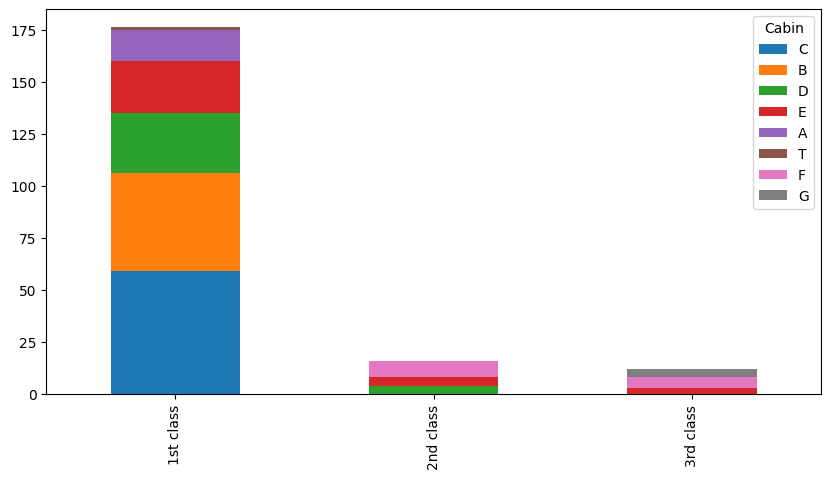

In [208]:
# 클래스별로 객실 종류 count
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

In [209]:
# classifier를 위해 매핑
# feature scaling : raw data 전처리하는 과정 (feature들의 크기, 범위 정규화)/ 소수점 사용
# 숫자의 범위가 비슷하지 않으면 먼 거리에 있는 데이터를 조금 더 중요하게 생각할 수 있음 주의

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [210]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# # fillna
train['Cabin'].fillna(
        train.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)
test['Cabin'].fillna(
        test.groupby('Pclass')['Cabin'].transform('median')
    ,   inplace=True
)
train.isnull().sum(), test.isnull().sum()
# train.tail(10)

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 group_size     0
 HasCabin       0
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 Title          0
 group_size     0
 HasCabin       0
 dtype: int64)

---
### Family Size
---

In [211]:
# 혼자타면 SibSp, Parch 모두 0으로 표시되므로 +1 해주기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [212]:
train['FamilySize'].value_counts(),test['FamilySize'].value_counts()

(FamilySize
 1     537
 2     161
 3     102
 4      29
 6      22
 5      15
 7      12
 11      7
 8       6
 Name: count, dtype: int64,
 FamilySize
 1     253
 2      74
 3      57
 4      14
 5       7
 7       4
 11      4
 6       3
 8       2
 Name: count, dtype: int64)

In [213]:
# mapping
# feature scaling 
family_mapping = {1: 0, 2: 0.5, 3: 1, 4: 1.5, 5: 2, 6: 2.5, 7: 3, 8: 3.5, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [214]:
# 불필요한 데이터 삭제 : drop
# Ticket, SibSp, Parch, PassengerId 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [215]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
group_size     0
HasCabin       0
FamilySize     0
dtype: int64

In [216]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,HasCabin,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.0,0,0.5
1,2,1,1,1,3.0,2.0,0.8,1,2,0.0,1,0.5
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0,0,0.0
3,4,1,1,1,2.0,1.0,0.8,0,2,1.0,1,0.5
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0,0,0.0


In [217]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Title', 'group_size', 'HasCabin', 'FamilySize'],
      dtype='object')

In [218]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 11), (891,))

In [219]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    int64  
 9   group_size   891 non-null    float64
 10  HasCabin     891 non-null    int64  
 11  FamilySize   891 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 83.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non

(None, None)

In [220]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,group_size,HasCabin,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.0,0,0.5
1,2,1,1,1,3.0,2.0,0.8,1,2,0.0,1,0.5
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0,0,0.0
3,4,1,1,1,2.0,1.0,0.8,0,2,1.0,1,0.5
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0,0,0.0


---
### modeling
---

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [222]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5408863920099877


In [223]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=2002)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.7609113607990012


In [224]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# clf = RandomForestClassifier(n_estimators=60, max_depth=4) # Knn Model object
# scoring = 'accuracy' #평가지표 : 정확도
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# print(score.mean())

---
### randomforest
---

In [225]:
clf = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=1, random_state=30)
clf.fit(train_data, target) # 학습
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
Y_pred = clf.predict(test) # 테스트 데이터로 예측값 추출
score.mean()

0.8237952559300874

In [226]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
        "Survived": Y_pred
    }
)
submission.to_csv('../result/titanic-1.csv', index=False)

In [227]:
# from sklearn.model_selection import GridSearchCV
# # n_estimators=600, max_depth=5
# parameters = {'max_depth' : np.arange(2, 10, dtype=int),
#               'n_estimators' :  np.arange(2, 100, dtype=int)}
#             #   ,'min_samples_split' : [3.5,7]
#             #   ,'min_samples_leaf' : [3,5,8]}
# grid_rfclf = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5)
# grid_rfclf.fit(train_data, target)
# print(grid_rfclf.best_params_)
# print(grid_rfclf.best_score_)

---
### Xgboost
---

In [228]:
# xgboost  = XGBClassifier()
# xgboost.fit(train_data, target)
# scoring = 'accuracy'
# score = cross_val_score(xgboost, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# Y_pred = xgboost.predict(test)
# print(score.mean())

# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('../result/titanic-3.csv', index=False)

---
### logistic
---

In [231]:
# logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
# logmodel.fit(train_data,target)
# scoring = 'accuracy'
# score = cross_val_score(logmodel, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# predictions = logmodel.predict(test)
# score.mean()

In [232]:
# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": predictions
#     })
# submission.to_csv('../result/titanic-4.csv', index=False)